Se encontraron 72 archivos


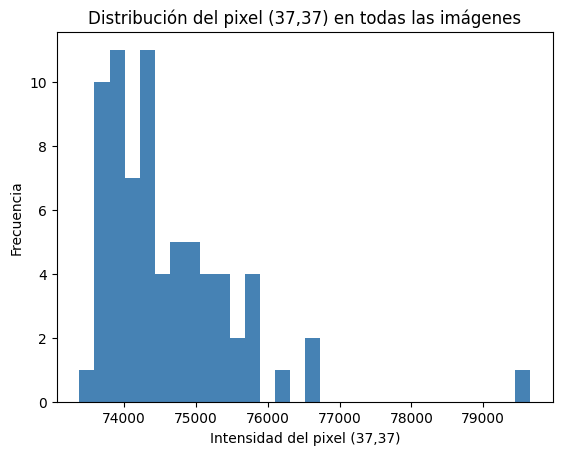

,"(10,10)","(37,37)","(60,60)"
0,109432.0,75877.0,97758.0
1,109703.0,74115.0,95369.0
2,109219.0,76128.0,97868.0
3,109193.0,74829.0,94588.0
4,109087.0,76614.0,97412.0


,file,mean,std,min,max,alpha,Ms,Aex,"(10,10)","(37,37)","(60,60)"
0,Sample_Image_2015-11-27_159.hdf5,93599.997867,13369.081102,75293.0,113008.0,0.043709,8.022088e+05,2.139362e-12,109432.0,75877.0,97758.0
1,Sample_Image_2015-11-27_160.hdf5,92534.432533,13940.058882,73224.0,112266.0,0.095564,1.126185e+06,1.147548e-12,109703.0,74115.0,95369.0
2,Sample_Image_2015-11-27_161.hdf5,93503.821156,13282.563154,75305.0,112768.0,0.075879,1.082743e+06,3.438257e-12,109219.0,76128.0,97868.0
3,Sample_Image_2015-11-27_162.hdf5,92501.441067,13901.262660,73399.0,112271.0,0.063879,1.091603e+06,3.010716e-12,109193.0,74829.0,94588.0
4,Sample_Image_2015-11-27_163.hdf5,93433.300800,13224.325731,75216.0,112445.0,0.024042,1.108508e+06,1.205915e-12,109087.0,76614.0,97412.0


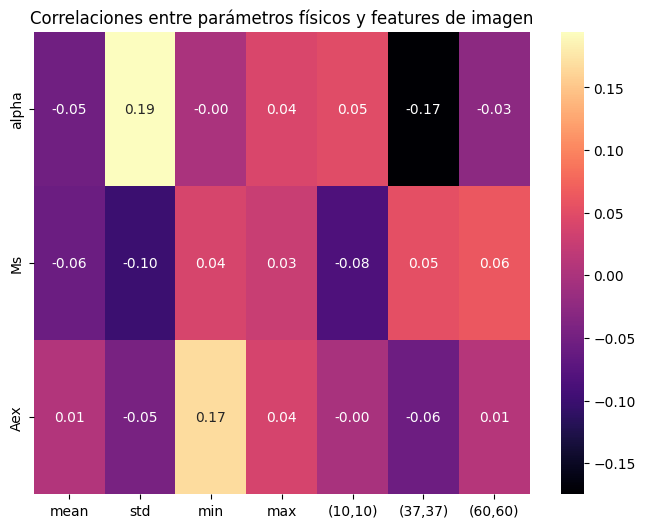

In [6]:
# =============================================
# 03_xmcd_features_vs_parameters.ipynb
# Conexión entre descriptores de imágenes XMCD y parámetros físicos
# =============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
import seaborn as sns

# --- 1. Cargar archivos HDF5 ---
data_path = Path("../data_raw/xmcd")
files = sorted(data_path.glob("*.hdf5"))
print(f"Se encontraron {len(files)} archivos")

def load_hdf5_image(file, key="entry1/analog0/data"):
    with h5py.File(file, "r") as f:
        data = np.array(f[key])
    if data.ndim == 3:
        return data[0]
    return data

# --- 2. Seleccionar un pixel específico ---
px, py = 37, 37  # centro aproximado en imágenes 75x75
pixel_values = []

for f in files:
    img = load_hdf5_image(f)
    pixel_values.append(img[px, py])

pixel_values = np.array(pixel_values)

plt.hist(pixel_values, bins=30, color="steelblue")
plt.xlabel(f"Intensidad del pixel ({px},{py})")
plt.ylabel("Frecuencia")
plt.title(f"Distribución del pixel ({px},{py}) en todas las imágenes")
plt.show()

# --- 3. Distribuciones de varios puntos de interés ---
points = [(10,10), (37,37), (60,60)]  # dentro del rango [0,74]
data_points = {}

for (px, py) in points:
    values = []
    for f in files:
        img = load_hdf5_image(f)
        values.append(img[px, py])
    data_points[f"({px},{py})"] = values

df_pixels = pd.DataFrame(data_points)
display(df_pixels.head())

# --- 4. Simulación de parámetros físicos ---
np.random.seed(42)
df_params = pd.DataFrame({
    "file": [f.name for f in files],
    "alpha": np.random.uniform(0.01, 0.1, size=len(files)),
    "Ms": np.random.uniform(800e3, 1200e3, size=len(files)),
    "Aex": np.random.uniform(1e-12, 5e-12, size=len(files))
})

# --- 5. Merge con features globales y locales ---
stats_path = Path("../notebooks/xmcd_stats.csv")
df_stats = pd.read_csv(stats_path)

df_merged = df_stats.merge(df_params, on="file")
df_merged = df_merged.join(df_pixels)

display(df_merged.head())

# --- 6. Correlaciones entre parámetros físicos y features ---
corr = df_merged.drop(columns=["file"]).corr()

# columnas de features = globales (mean, std, min, max) + locales (pixeles)
features = list(df_stats.columns[1:]) + list(df_pixels.columns)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr.loc[["alpha","Ms","Aex"], features],
    annot=True, cmap="magma", fmt=".2f"
)
plt.title("Correlaciones entre parámetros físicos y features de imagen")
plt.show()


In [ ]:
img = load_hdf5_image(files[0])
h, w = img.shape
print("Tamaño de la imagen:", h, "x", w)

points = [
    (h//4, w//4),       # cuadrante superior izq
    (h//2, w//2),       # centro
    (3*h//4, 3*w//4)    # cuadrante inferior der
]


Tamaño de la imagen: 75 x 75
